# Initial Data Exploration

## Fetching Data

In [174]:
from astropy.table import Table
from astropy.io import fits
qpo_vt = fits.open('qpo_vt_example.fits')
tab = Table.read(qpo_vt, hdu='COMBINED')
df = tab.to_pandas()
df.isna()


,VT_ID,RA,DEC,RADEC_OG,IN_MXT,OBJID_R0,OBJID_R1,OBJID_R2,OBJID_R3,OBJID_B0,OBJID_B1,OBJID_B2,OBJID_B3,RA_R0,RA_R1,RA_R2,RA_R3,RA_B0,RA_B1,RA_B2,RA_B3,DEC_R0,DEC_R1,DEC_R2,DEC_R3,DEC_B0,DEC_B1,DEC_B2,DEC_B3,MAGCAL_R0,MAGCAL_R1,MAGCAL_R2,MAGCAL_R3,MAGCAL_B0,MAGCAL_B1,MAGCAL_B2,MAGCAL_B3,MAGERR_R0,MAGERR_R1,MAGERR_R2,MAGERR_R3,MAGERR_B0,MAGERR_B1,MAGERR_B2,MAGERR_B3,MAGVAR_R1,MAGVAR_R2,MAGVAR_R3,MAGVAR_B1,MAGVAR_B2,MAGVAR_B3,EFLAG_R0,EFLAG_R1,EFLAG_R2,EFLAG_R3,EFLAG_B0,EFLAG_B1,EFLAG_B2,EFLAG_B3,XFLAG_R0,XFLAG_R1,XFLAG_R2,XFLAG_R3,XFLAG_B0,XFLAG_B1,XFLAG_B2,XFLAG_B3,VFLAG_R1,VFLAG_R2,VFLAG_R3,VFLAG_B1,VFLAG_B2,VFLAG_B3,SEQFLAG0,SEQFLAG1,SEQFLAG2,SEQFLAG3,NEW_SRC,DMAG_CAT,MAG_VAR
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,False,False,False,False,False,False,True,False,False,True,True,False,False,False,True,False,False,True,True,False,False,False,True,False,False,True,True,False,False,False,True,False,False,True,True,False,False,False,True,False,False,True,True,False,False,True,False,False,True,False,False,False,True,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True
145,False,False,False,False,False,False,True,False,False,True,True,False,False,False,True,False,False,True,True,False,False,False,Tru

In [175]:
qpo_vt["COMBINED"].header

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                  705 / length of dimension 1                          
NAXIS2  =                  149 / length of dimension 2                          
PCOUNT  =                    0 / number of group parameters                     
GCOUNT  =                    1 / number of groups                               
TFIELDS =                   80 / number of table fields                         
EXTNAME = 'COMBINED'                                                            
R_XMATCH=                  1.0 / Combination crossmatch radius in arcsec        
MXT_RA  =    212.6408177188752 / RA from QPO_MXT used for filtering in deg      
MXT_DEC =    29.69708513294715 / Dec from QPO_MXT used for filtering in deg     
MXT_ERR =  0.011388888888888

# Proto-Pipeline

## Proto-DataFrame
The dataset used here is from the Sloan Digital Sky Survey taken from: 

fedesoriano. (January 2022). Stellar Classification Dataset - SDSS17. Retrieved [Date Retrieved] from https://www.kaggle.com/fedesoriano/stellar-classification-dataset-sdss17.

In [176]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


df  = pd.read_csv('star_classification.csv')
df.head()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842


## Exploratory Data Analysis


In [177]:
df.shape

(100000, 18)

In [178]:
df.columns

Index(['obj_ID', 'alpha', 'delta', 'u', 'g', 'r', 'i', 'z', 'run_ID',
       'rerun_ID', 'cam_col', 'field_ID', 'spec_obj_ID', 'class', 'redshift',
       'plate', 'MJD', 'fiber_ID'],
      dtype='object')

In [179]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   obj_ID       100000 non-null  float64
 1   alpha        100000 non-null  float64
 2   delta        100000 non-null  float64
 3   u            100000 non-null  float64
 4   g            100000 non-null  float64
 5   r            100000 non-null  float64
 6   i            100000 non-null  float64
 7   z            100000 non-null  float64
 8   run_ID       100000 non-null  int64  
 9   rerun_ID     100000 non-null  int64  
 10  cam_col      100000 non-null  int64  
 11  field_ID     100000 non-null  int64  
 12  spec_obj_ID  100000 non-null  float64
 13  class        100000 non-null  object 
 14  redshift     100000 non-null  float64
 15  plate        100000 non-null  int64  
 16  MJD          100000 non-null  int64  
 17  fiber_ID     100000 non-null  int64  
dtypes: float64(10), int64(7),

In [180]:
df['class'].head(15)

0     GALAXY
1     GALAXY
2     GALAXY
3     GALAXY
4     GALAXY
5        QSO
6        QSO
7     GALAXY
8     GALAXY
9       STAR
10    GALAXY
11    GALAXY
12      STAR
13    GALAXY
14    GALAXY
Name: class, dtype: object

In [181]:
df['class'] = (df['class'] =='GALAXY').astype(int)
df['class'].head(15)

0     1
1     1
2     1
3     1
4     1
5     0
6     0
7     1
8     1
9     0
10    1
11    1
12    0
13    1
14    1
Name: class, dtype: int64

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
obj_ID,1.000000,0.013735,0.301237,0.015310,0.015710,0.153891,0.147670,0.013811,1.000000,NaN,0.046997,0.031498,0.239461,0.019994,0.065400,0.239460,0.262687,0.067178
alpha,0.013735,1.000000,0.138691,0.001532,0.002423,0.022083,0.023580,0.002918,0.013737,NaN,0.019582,0.165577,0.002553,0.004085,0.001667,0.002554,0.019943,0.030464
delta,0.301237,0.138691,1.000000,0.002074,0.003523,0.006835,0.004480,0.003630,0.301238,NaN,0.032565,0.173416,0.112329,0.038297,0.031638,0.112329,0.107333,0.028250
u,0.015310,0.001532,0.002074,1.000000,0.999311,0.054149,0.045730,0.998093,0.015309,NaN,0.003548,0.008374,0.029997,0.023129,0.014309,0.029997,0.031997,0.016305
g,0.015710,0.002423,0.003523,0.999311,1.000000,0.062387,0.056271,0.999161,0.015710,NaN,0.003508,0.008852,0.039443,0.014289,0.022954,0.039443,0.040274,0.017470
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
class,0.019994,0.004085,0.038297,0.023129,0.014289,0.037997,0.160379,0.008382,0.019996,NaN,0.020569,0.039654,0.109753,1.000000,0.256925,0.109753,0.110584,0.005923
redshift,0.065400,0.001667,0.031638,0.014309,0.022954,0.433241,0.492383,0.030380,0.065400,NaN,0.000097,0.021331,0.388642,0.256925,1.000000,0.388641,0.387109,0.127044
plate,0.239460,0.002554,0.112329,0.029997,0.039443,0.655243,0.661640,0.037813,0.239459,NaN,0.001949,0.083471,1.000000,0.109753,0.388641,1.000000,0.970166,0.241258
MJD,0.262687,0.019943,0.107333,0.031997,0.040274,0.671180,0.672523,0.037469,0.262687,NaN,0.006745,0.095064,0.970167,0.110584,0.387109,0.970166,1.000000,0.256970


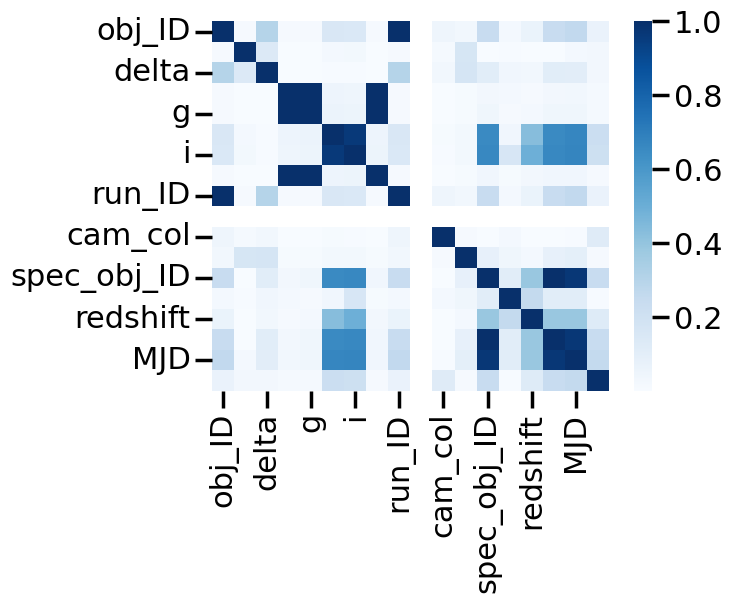

In [182]:
corr_matrix = abs(df.corr())
sns.heatmap(corr_matrix, cmap='Blues')
corr_matrix

/Users/jeremypalmerio/opt/miniconda3/envs/VTAC/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


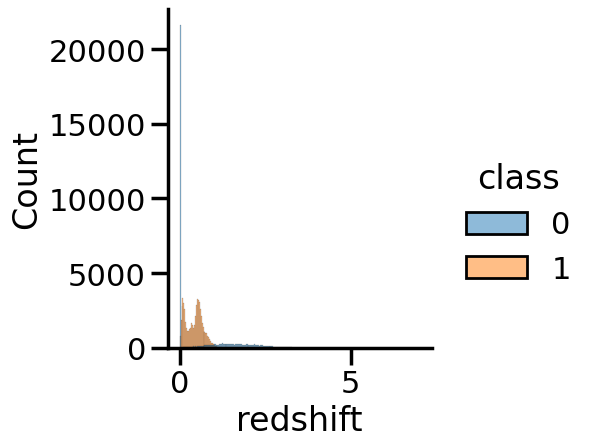

In [183]:
df_z = df[['class', 'redshift']]
sns.displot(data = df, x = 'redshift', hue='class')
#plt.xscale('log')


## Playing with Different Models 

In [184]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

X = df.drop(columns='class')
y = df['class']

### Logistic Regression


In [185]:
from sklearn.linear_model import LogisticRegression

In [186]:
X_train, X_test,y_train, y_test = train_test_split(X, y, test_size=0.2)

model = LogisticRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [187]:
train_acc =model.score(X_train, y_train)
test_acc = model.score(X_test, y_test)

print("Training accuracy:", train_acc)
print("Testing accuracy:", test_acc)

Training accuracy: 0.6072
Testing accuracy: 0.611


In [188]:
###manually making confusion table from a different threshold
def t_repredict(est, t, xtest):
    probs = est.predict_proba(xtest)
    p0 = probs[:,0]
    p1 = probs[:,1]
    ypred = (p1 > t)*1
    return ypred

In [189]:
threshold = 0.5
print("Training CM: \n", confusion_matrix(y_train,t_repredict(model, threshold, X_train)))
print("Testing CM: \n",confusion_matrix(y_test,t_repredict(model, threshold, X_test)))


Training CM: 
 [[ 2981 29544]
 [ 1880 45595]]
Testing CM: 
 [[  730  7300]
 [  480 11490]]


In [190]:
#making ROC curves for this model
from sklearn.metrics import roc_curve, auc

#name: name of your model to appear on the figure (can be arbitrary)
#clf: the model as you named it - will be used for getting the predictions
#ytest, xtest: your test data
#skip, labe: steps that control how many points you see in the ROC curve and how many labels are there

def make_roc(name, clf, ytest, xtest, ax=None, labe=5, proba=True, skip=0):
    initial=False
    if not ax:
        ax=plt.gca()
        initial=True
    if proba:#for stuff like logistic regression
        fpr, tpr, thresholds=roc_curve(ytest, clf.predict_proba(xtest)[:,1])
    else:#for stuff like SVM? (but double-check this pleaseee)
        fpr, tpr, thresholds=roc_curve(ytest, clf.decision_function(xtest))
    
    #this is the single value for the AUC score
    roc_auc = auc(fpr, tpr)
    
    if skip: 
        l=fpr.shape[0]
        ax.plot(fpr[0:l:skip], tpr[0:l:skip], '.-', alpha=0.3, label='ROC curve for %s (area = %0.2f)' % (name, roc_auc))
    else:
        ax.plot(fpr, tpr, '.-', alpha=0.3, label='ROC curve for %s (area = %0.2f)' % (name, roc_auc))
    
    label_kwargs = {}
    label_kwargs['bbox'] = dict(
        boxstyle='round,pad=0.3', alpha=0.2,
    )
    
    #add labels to the curve
    if labe!=None:
        for k in range(0, fpr.shape[0],labe):
            #from https://gist.github.com/podshumok/c1d1c9394335d86255b8
            threshold = str(np.round(thresholds[k], 2))
            ax.annotate(threshold, (fpr[k], tpr[k]), **label_kwargs)
    
    if initial:
        ax.plot([0, 1], [0, 1], 'k--')
        ax.set_xlim([0.0, 1.0])
        ax.set_ylim([0.0, 1.05])
        ax.set_xlabel('False Positive Rate')
        ax.set_ylabel('True Positive Rate')
        ax.set_title('ROC')
    ax.legend(loc="lower right")
    return ax

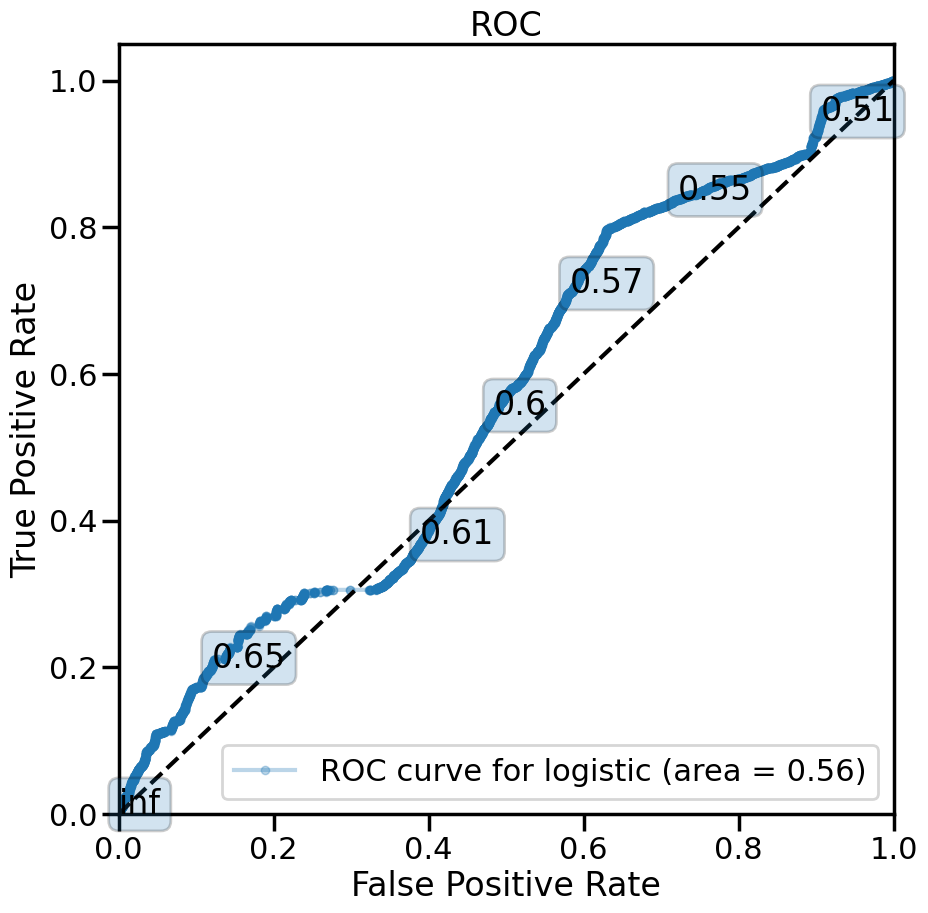

In [191]:
#This is how the above function should be used

sns.set_context("poster")
fig, ax = plt.subplots(figsize = (10,10))
ax=make_roc("logistic",model, y_test, X_test, labe=1000,  skip=0)
plt.show()

### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_classification

RFmodel = RandomForestClassifier()

param_grid = {
    'n_estimators': [10, 20, 30, 40 ],
    'max_depth': [None, 1, 2, 3],
    'min_samples_split': [2, 3, 4, 5]
}

grid_search = GridSearchCV(RFmodel, param_grid=param_grid, cv=5)
grid_search.fit(X, y)

# Print the best hyperparameters and corresponding score
print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


RFmodel = RandomForestClassifier(**grid_search.best_params_)


RFmodel.fit(X_train, y_train)
y_pred = RFmodel.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)
print(report)

In [ ]:
import time
start_time = time.time()
importances = RFmodel.feature_importances_
std = np.std([tree.feature_importances_ for tree in RFmodel.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

In [ ]:
feature_names = [name for name in X.columns]
forest_importances = pd.Series(importances, index=feature_names)
forest_importances = forest_importances.sort_values(ascending=False)

fig, ax = plt.subplots(figsize = (5,6))
forest_importances.head(15).plot.barh(ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
